In this notebook, we'll look at featurizing fatigue to see if we can get lift on our models through this.
The Sipko paper indicates that fatigue can be featurized by:

* Number of matches played in last 3 days
* Indicator for whether this is the first match back after retiring from one 

In [1]:
from fetch.match_results import read_joined 

df, player_mapping, inverse_player_mapping = read_joined()

/Users/siddhantjagadish/Documents/DataProjects/tennis_modeling/tennis_modeling/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2818: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [2]:
# Before 2003, no distinction in date between matches
df = df[df['date'] >= '2003-01-01'].copy()

In [3]:
df.sort(['date', 'round'], inplace=True)

/Users/siddhantjagadish/Documents/DataProjects/tennis_modeling/tennis_modeling/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  """Entry point for launching an IPython kernel.


In [4]:
df.columns.tolist()

['atp',
 'avgl',
 'avgw',
 'b&wl',
 'b&ww',
 'b365l',
 'b365w',
 'best of',
 'cbl',
 'cbw',
 'comment',
 'court',
 'date',
 'exl',
 'exw',
 'gbl',
 'gbw',
 'iwl',
 'iww',
 'l1',
 'l2',
 'l3',
 'l4',
 'l5',
 'lbl',
 'lbw',
 'lpts',
 'lrank',
 'location',
 'loser',
 'lsets',
 'maxl',
 'maxw',
 'psl',
 'psw',
 'round',
 'sbl',
 'sbw',
 'sjl',
 'sjw',
 'series',
 'surface',
 'tournament',
 'ubl',
 'ubw',
 'unnamed: 0',
 'unnamed: 1',
 'unnamed: 2',
 'unnamed: 3',
 'unnamed: 4',
 'w1',
 'w2',
 'w3',
 'w4',
 'w5',
 'wpts',
 'wrank',
 'winner',
 'wsets',
 'match_id',
 '__surface__',
 'wgames',
 'lgames',
 'total_games',
 'p1',
 'p2',
 'p1_idx',
 'p2_idx',
 'p1_rank',
 'p2_rank',
 'p1_odds',
 'p2_odds',
 'p1_b365',
 'p2_b365',
 'p1_games',
 'p2_games',
 'y']

#### Retirement
Let's look at whether people who retired in their last match actually do worse

In [5]:
import numpy as np
import pandas as pd

def featurize_player(player, num_days=3):
    print "Featurizing %s..." % player
    player_df = df[
        (df['loser'] == player) |
        (df['winner'] == player)
    ].copy()

    player_df['last_retired'] = (
        (player_df['loser'] == player) &
        (player_df['comment'] == 'Retired')
    ).astype(int).shift(1)
    player_df['last_retired'].fillna(0, inplace=True)
    player_df.index = pd.to_datetime(player_df['date'])

    player_df['__count__'] = 1
    player_df['fatigue_matches'] = player_df.rolling('%dd' % num_days)['__count__'].sum() - 1
    player_df['fatigue_matches'] = player_df['fatigue_matches'].clip(lower=0.)

    # Subtract current games because rolling sum includes them...
    player_df['fatigue_games'] = player_df.rolling('3d')['total_games'].sum() - player_df['total_games']
    
    player_df['player'] = player
    player_df['time_since_last_match'] = player_df['date'].diff().map(
        lambda x: np.nan if pd.isnull(x) else x.days
    ).astype(float)

    return player_df[[
        'player',
        'match_id',
        'last_retired',
        'fatigue_matches',
        'fatigue_games',
        'time_since_last_match'
    ]]

In [6]:
all_players = sorted(set(df['winner']) | set(df['loser']))
player_dfs = [
    featurize_player(p) for p in all_players
]

Featurizing Abdulla M....
Featurizing Abel M....
Featurizing Acasuso J....
Featurizing Adaktusson J....
Featurizing Agassi A....
Featurizing Ager J....
Featurizing Agostinelli B....
Featurizing Aguilar J....
Featurizing Ahouda A....
Featurizing Al Ghareeb M....
Featurizing Al Mutawa J....
Featurizing Al-Ghareeb M....
Featurizing Alawadhi O....
Featurizing Albot R....
Featurizing Alcaide G....
Featurizing Aldi F....
Featurizing Ali Mutawa J.M....
Featurizing Allegro Y....
Featurizing Almagro N....
Featurizing Altamirano C....
Featurizing Altmaier D....
Featurizing Alund M....
Featurizing Alves T....
Featurizing Amritraj P....
Featurizing Ancic I....
Featurizing Ancic M....
Featurizing Andersen J....
Featurizing Andersen J.F....
Featurizing Anderson A....
Featurizing Anderson K....
Featurizing Anderson O....
Featurizing Andersson H....
Featurizing Andreev A....
Featurizing Andreev I....
Featurizing Andreozzi G....
Featurizing Androic T....
Featurizing Andujar P....
Featurizing Aragone J.

Featurizing Ferreiro F....
Featurizing Ferrer D....
Featurizing Ferrero J....
Featurizing Ferrero J.C....
Featurizing Fidirko N....
Featurizing Fischer M....
Featurizing Fish A....
Featurizing Fish M....
Featurizing Fitz S....
Featurizing Flanagan I....
Featurizing Fleishman Z....
Featurizing Fleming C....
Featurizing Fognini F....
Featurizing Fogues F....
Featurizing Fornell M....
Featurizing Fraile G....
Featurizing Fratangelo B....
Featurizing Friedl L....
Featurizing Fritz T....
Featurizing Fruttero J.P....
Featurizing Fucsovics M....
Featurizing Furlan R....
Featurizing Fyrstenberg M....
Featurizing Gabashvili T....
Featurizing Gaio F....
Featurizing Galan D.E....
Featurizing Galdon P....
Featurizing Galimberti G....
Featurizing Gallardo M....
Featurizing Gallardo Valles M....
Featurizing Galovic V....
Featurizing Galvani S....
Featurizing Gambill J. M....
Featurizing Gambill J.M....
Featurizing Gamonal H....
Featurizing Garcia A....
Featurizing Garcia-Lopez G....
Featurizing Gard

Featurizing Luczak P....
Featurizing Luncanu P.A....
Featurizing Luque D....
Featurizing Luxa P....
Featurizing Luz O....
Featurizing Luzzi F....
Featurizing Maamoun K....
Featurizing MacLagan M....
Featurizing Machado R....
Featurizing Mackin A....
Featurizing Maden Y....
Featurizing Mager G....
Featurizing Mahut N....
Featurizing Majchrzak K....
Featurizing Malisse X....
Featurizing Mamiit C....
Featurizing Mankad H....
Featurizing Mannarino A....
Featurizing Mantilla F....
Featurizing Marach O....
Featurizing Marcaccio G....
Featurizing Marcan D....
Featurizing March O....
Featurizing Marchenko I....
Featurizing Marcora R....
Featurizing Marin J.A...
Featurizing Marin J.A....
Featurizing Marrai M....
Featurizing Marray J....
Featurizing Marrero D....
Featurizing Marterer M....
Featurizing Marti J....
Featurizing Marti Y....
Featurizing Martin A....
Featurizing Martin F....
Featurizing Martin T....
Featurizing Martinez P....
Featurizing Massa E....
Featurizing Massu N....
Featurizing

Featurizing Schuettler P....
Featurizing Schuettler R....
Featurizing Schukin Y....
Featurizing Schuttler P....
Featurizing Schwank E....
Featurizing Schwartzman D....
Featurizing Sekulic M....
Featurizing Sela D....
Featurizing Seppi A....
Featurizing Serdarusic N....
Featurizing Sergeyev I....
Featurizing Serra F....
Featurizing Serrano O....
Featurizing Setkic A....
Featurizing Settergren J....
Featurizing Seyboth Wild T....
Featurizing Shane R....
Featurizing Shapovalov D....
Featurizing Sherwood D....
Featurizing Shimada T....
Featurizing Shyla Y....
Featurizing Si Y.M....
Featurizing Sidorenko A....
Featurizing Sijsling I....
Featurizing Silva D....
Featurizing Silva F....
Featurizing Silva F.F....
Featurizing Silva J....
Featurizing Simmonds P....
Featurizing Simon G....
Featurizing Simonsson F....
Featurizing Singh N....
Featurizing Singh S....
Featurizing Sirianni J....
Featurizing Siriluethaiwattana P....
Featurizing Sitak A....
Featurizing Skoch D....
Featurizing Skugor F...

In [7]:
player_feats = pd.concat(player_dfs)
assert player_feats.shape[0] == df.shape[0] * 2

In [8]:
# Merge in player feats
feats = [col for col in player_feats.columns if col not in ('match_id', 'player')]
df = pd.merge(
    df,
    player_feats,
    left_on=['match_id', 'p1'],
    right_on=['match_id', 'player']
)
df.rename(columns={f: 'p1_%s' % f for f in feats}, inplace=True)
df = pd.merge(
    df,
    player_feats,
    left_on=['match_id', 'p2'],
    right_on=['match_id', 'player']
)
df.rename(columns={f: 'p2_%s' % f for f in feats}, inplace=True)

In [9]:
assert df['p1_fatigue_matches'].isnull().sum() == 0
assert df['p2_fatigue_matches'].isnull().sum() == 0

In [10]:
df['fatigue_diff'] = df['p1_fatigue_matches'] - df['p2_fatigue_matches']
df.groupby('fatigue_diff').apply(
    lambda x: (x.shape[0], x['y'].mean())
)

fatigue_diff
-3.0        (3, 0.333333333333)
-2.0      (123, 0.471544715447)
-1.0     (4167, 0.570674346052)
 0.0    (29804, 0.503489464501)
 1.0     (4175, 0.460359281437)
 2.0      (146, 0.541095890411)
 3.0        (3, 0.666666666667)
dtype: object

Fatigue difference seems to explain quite a bit!

In [11]:
df['time_diff'] = df['p1_time_since_last_match'] - df['p2_time_since_last_match']

out = []
for td in range(100):
    d1 = df[df['time_diff'] > td]['y'].mean()
    d2 = 1. - df[df['time_diff'] < -td]['y'].mean()
    out.append((d1 + d2) / 2.)

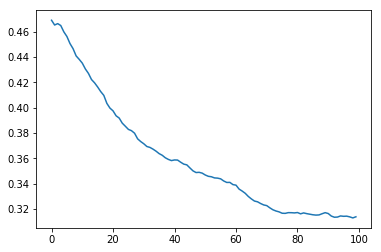

In [12]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.plot(out)

The greater the time since a player's last match, the worse they perform!  This may be because worse players don't last til the end of a tournament

In [13]:
def investigate_row(row):
    p1 = row['p1']
    p2 = row['p2']
    return df[
        # (df['tournament'] == row['tournament']) &
        (df['date'] < '2004-01-01') &
        (
            (df['winner'].map(lambda x: x in (p1, p2))) | 
            (df['loser'].map(lambda x: x in (p1, p2)))
        )
    ][['tournament', 'round', 'date', 'p1', 'p2', 'winner', 'loser', 'p1_fatigue_matches', 'p2_fatigue_matches']]

#### Try Model with New Features

In [14]:
MIN_TRAIN_DATE = '2004-01-01'
MIN_TEST_DATE = '2015-01-01'
MAX_TEST_DATE = '2017-01-01'

train_df = df[
    (df['date'] >= MIN_TRAIN_DATE) &
    (df['date'] < MIN_TEST_DATE)
].copy()
test_df = df[
    (df['date'] >= MIN_TEST_DATE) &
    (df['date'] < MAX_TEST_DATE) &
    (df['__surface__'] == 'Hard') &
    (~df['comment'].isin(['Retired', 'Walkover']))
].copy()

In [15]:
from models.logit.base import get_X_y

orig_train_X, orig_train_y = get_X_y(train_df, player_mapping)
orig_test_X, orig_test_y = get_X_y(test_df, player_mapping)

##### Old Model with No Additional Features

In [16]:
from models.logit.base import sipko_weights

DISCOUNT = 0.8
FLAT_TIME = 1.0
PRIOR = 0.
LMBDA = 1.

time_weights = sipko_weights(
    train_df['date'].max(),
    train_df,
    DISCOUNT,
    flat_time=FLAT_TIME
)
surface_weights = train_df['__surface__'].map(
    lambda x: {
        'Hard': 1.0,
        'Clay': 0.8,
        'Grass': 1.0,
        'Indoor': 1.0 
    }[x]
)
sample_weights = time_weights * surface_weights

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

logit = LogisticRegression(C=0.4)
logit.fit(orig_train_X, orig_train_y, sample_weight=sample_weights)
preds = logit.predict_proba(orig_test_X)[:, 1]
orig_auc = roc_auc_score(orig_test_y, preds)
orig_auc

0.74182723521198157

In [18]:
train_preds = logit.predict_proba(orig_train_X)[:, 1]
roc_auc_score(orig_train_y, train_preds)

0.7439649212904289

##### Now let's add some additional features

In [19]:
df['time_diff'] = df['p1_time_since_last_match'] - df['p2_time_since_last_match']
# df['p1_comeback'] = (df['p1_time_since_last_match'] > 5).map(int)
# df['p2_comeback'] = (df['p2_time_since_last_match'] > 5).map(int)
df['p1_comeback'] = (df['time_diff'] > 5).map(int)
df['p2_comeback'] = (df['time_diff'] < -5).map(int)
df['comeback_diff'] = (df['p1_comeback'] - df['p2_comeback'])
df['fatigue_diff'] = df['p1_fatigue_games'] - df['p2_fatigue_games']
df['retire_diff'] = df['p1_last_retired'] - df['p2_last_retired']

In [20]:
df['time_diff'].fillna(0, inplace=True)

In [21]:
MIN_TRAIN_DATE = '2004-01-01'
MIN_TEST_DATE = '2015-01-01'
MAX_TEST_DATE = '2017-01-01'

train_df = df[
    (df['date'] >= MIN_TRAIN_DATE) &
    (df['date'] < MIN_TEST_DATE)
].copy()
test_df = df[
    (df['date'] >= MIN_TEST_DATE) &
    (df['date'] < MAX_TEST_DATE) &
    (df['__surface__'] == 'Hard') &
    (~df['comment'].isin(['Retired', 'Walkover']))  # Remove retire from test set
].copy()

In [22]:
from models.logit.base import get_X_y

orig_train_X, orig_train_y = get_X_y(train_df, player_mapping)
orig_test_X, orig_test_y = get_X_y(test_df, player_mapping)

In [23]:
test_df.shape

(1898, 93)

In [24]:
orig_test_y.shape

(1898,)

In [25]:
from scipy import sparse

NEW_FEATS = [
    'comeback_diff',
    'fatigue_diff',
    'retire_diff',
    'time_diff'
]
new_train_X = sparse.hstack([
    orig_train_X,
    sparse.csc_matrix(train_df[NEW_FEATS].values)
])
new_test_X = sparse.hstack([
    orig_test_X,
    sparse.csc_matrix(test_df[NEW_FEATS].values)
])

In [26]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression(C=0.4)
logit.fit(new_train_X, orig_train_y, sample_weight=sample_weights)
logit.coef_

array([[ -1.30958686e-01,   0.00000000e+00,   2.71197443e+00, ...,
         -5.75249048e-03,  -6.27468209e-02,  -8.92061843e-04]])

In [27]:
logit.coef_[0][-4:]

array([-0.13402288, -0.00575249, -0.06274682, -0.00089206])

In [28]:
train_preds = logit.predict_proba(new_train_X)[:, 1]
train_auc = roc_auc_score(orig_train_y, train_preds)
train_auc

0.74539589508261117

In [29]:
_preds = logit.predict_proba(new_test_X)[:, 1]
roc_auc_score(orig_test_y, _preds)

0.74683383879258969

#### Try updating as we go 

Now we will try updating this model as we go...

In [31]:
NEW_FEATS = [
    'comeback_diff',
    'fatigue_diff',
]

def try_update_period(update_period=10):
    preds = []
    cur_date = test_df['date'].min()
    while(cur_date < pd.to_datetime(MAX_TEST_DATE)):
        print cur_date
        cur_train_df = df[
            (df['date'] >= MIN_TRAIN_DATE) &
            (df['date'] < cur_date)
        ].copy()
        cur_test_df = df[
            (df['date'] >= cur_date) &
            (df['date'] < cur_date + pd.Timedelta(days=update_period)) &
            (df['date'] < MAX_TEST_DATE) &
            (df['__surface__'] == 'Hard') &
            (~df['comment'].isin(['Retired', 'Walkover']))  # Remove retire from test set
        ].copy()
        if cur_test_df.shape[0] > 0:
            cur_orig_train_X, cur_orig_train_y = get_X_y(cur_train_df, player_mapping)
            cur_orig_test_X, cur_orig_test_y = get_X_y(cur_test_df, player_mapping)

            new_train_X = sparse.hstack([
                cur_orig_train_X,
                sparse.csc_matrix(cur_train_df[NEW_FEATS].values)
            ])
            new_test_X = sparse.hstack([
                cur_orig_test_X,
                sparse.csc_matrix(cur_test_df[NEW_FEATS].values)
            ])

            time_weights = sipko_weights(
                cur_train_df['date'].max(),
                cur_train_df,
                DISCOUNT,
                flat_time=FLAT_TIME
            )
            surface_weights = cur_train_df['__surface__'].map(
                lambda x: {
                    'Hard': 1.0,
                    'Clay': 0.8,
                    'Grass': 1.0,
                    'Indoor': 1.0 
                }[x]
            )
            sample_weights = time_weights * surface_weights

            logit = LogisticRegression(C=0.4)
            logit.fit(new_train_X, cur_orig_train_y, sample_weight=sample_weights)
            preds.extend(logit.predict_proba(new_test_X)[:, 1].tolist())
        cur_date = cur_date + pd.Timedelta(days=update_period)
    auc = roc_auc_score(orig_test_y, preds)
    return auc, preds

In [32]:
aucs = []
for period in [1, 5, 10, 20, 50, 100]:
    auc, _ = try_update_period(update_period=period)
    aucs.append((period, auc))

2015-01-05 00:00:00
2015-01-06 00:00:00
2015-01-07 00:00:00
2015-01-08 00:00:00
2015-01-09 00:00:00
2015-01-10 00:00:00
2015-01-11 00:00:00
2015-01-12 00:00:00
2015-01-13 00:00:00
2015-01-14 00:00:00
2015-01-15 00:00:00
2015-01-16 00:00:00
2015-01-17 00:00:00
2015-01-18 00:00:00
2015-01-19 00:00:00
2015-01-20 00:00:00
2015-01-21 00:00:00
2015-01-22 00:00:00
2015-01-23 00:00:00
2015-01-24 00:00:00
2015-01-25 00:00:00
2015-01-26 00:00:00
2015-01-27 00:00:00
2015-01-28 00:00:00
2015-01-29 00:00:00
2015-01-30 00:00:00
2015-01-31 00:00:00
2015-02-01 00:00:00
2015-02-02 00:00:00
2015-02-03 00:00:00
2015-02-04 00:00:00
2015-02-05 00:00:00
2015-02-06 00:00:00
2015-02-07 00:00:00
2015-02-08 00:00:00
2015-02-09 00:00:00
2015-02-10 00:00:00
2015-02-11 00:00:00
2015-02-12 00:00:00
2015-02-13 00:00:00
2015-02-14 00:00:00
2015-02-15 00:00:00
2015-02-16 00:00:00
2015-02-17 00:00:00
2015-02-18 00:00:00
2015-02-19 00:00:00
2015-02-20 00:00:00
2015-02-21 00:00:00
2015-02-22 00:00:00
2015-02-23 00:00:00


2016-02-19 00:00:00
2016-02-20 00:00:00
2016-02-21 00:00:00
2016-02-22 00:00:00
2016-02-23 00:00:00
2016-02-24 00:00:00
2016-02-25 00:00:00
2016-02-26 00:00:00
2016-02-27 00:00:00
2016-02-28 00:00:00
2016-02-29 00:00:00
2016-03-01 00:00:00
2016-03-02 00:00:00
2016-03-03 00:00:00
2016-03-04 00:00:00
2016-03-05 00:00:00
2016-03-06 00:00:00
2016-03-07 00:00:00
2016-03-08 00:00:00
2016-03-09 00:00:00
2016-03-10 00:00:00
2016-03-11 00:00:00
2016-03-12 00:00:00
2016-03-13 00:00:00
2016-03-14 00:00:00
2016-03-15 00:00:00
2016-03-16 00:00:00
2016-03-17 00:00:00
2016-03-18 00:00:00
2016-03-19 00:00:00
2016-03-20 00:00:00
2016-03-21 00:00:00
2016-03-22 00:00:00
2016-03-23 00:00:00
2016-03-24 00:00:00
2016-03-25 00:00:00
2016-03-26 00:00:00
2016-03-27 00:00:00
2016-03-28 00:00:00
2016-03-29 00:00:00
2016-03-30 00:00:00
2016-03-31 00:00:00
2016-04-01 00:00:00
2016-04-02 00:00:00
2016-04-03 00:00:00
2016-04-04 00:00:00
2016-04-05 00:00:00
2016-04-06 00:00:00
2016-04-07 00:00:00
2016-04-08 00:00:00


2016-04-29 00:00:00
2016-05-04 00:00:00
2016-05-09 00:00:00
2016-05-14 00:00:00
2016-05-19 00:00:00
2016-05-24 00:00:00
2016-05-29 00:00:00
2016-06-03 00:00:00
2016-06-08 00:00:00
2016-06-13 00:00:00
2016-06-18 00:00:00
2016-06-23 00:00:00
2016-06-28 00:00:00
2016-07-03 00:00:00
2016-07-08 00:00:00
2016-07-13 00:00:00
2016-07-18 00:00:00
2016-07-23 00:00:00
2016-07-28 00:00:00
2016-08-02 00:00:00
2016-08-07 00:00:00
2016-08-12 00:00:00
2016-08-17 00:00:00
2016-08-22 00:00:00
2016-08-27 00:00:00
2016-09-01 00:00:00
2016-09-06 00:00:00
2016-09-11 00:00:00
2016-09-16 00:00:00
2016-09-21 00:00:00
2016-09-26 00:00:00
2016-10-01 00:00:00
2016-10-06 00:00:00
2016-10-11 00:00:00
2016-10-16 00:00:00
2016-10-21 00:00:00
2016-10-26 00:00:00
2016-10-31 00:00:00
2016-11-05 00:00:00
2016-11-10 00:00:00
2016-11-15 00:00:00
2016-11-20 00:00:00
2016-11-25 00:00:00
2016-11-30 00:00:00
2016-12-05 00:00:00
2016-12-10 00:00:00
2016-12-15 00:00:00
2016-12-20 00:00:00
2016-12-25 00:00:00
2016-12-30 00:00:00


Text(0,0.5,'AUC')

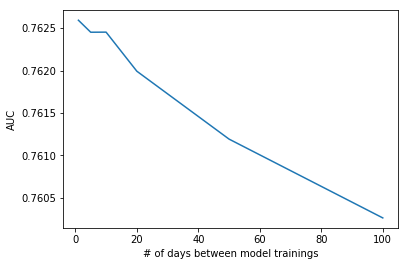

In [33]:
%matplotlib inline
from matplotlib import pyplot as plt

plt.plot(
    zip(*aucs)[0],
    zip(*aucs)[1]
)
plt.xlabel('# of days between model trainings')
plt.ylabel('AUC')

The more frequently we update the model training, the better the model performs.  Notably, updating every day performs quite a lot better than letting our model run for years on end...(thank fuck for that)

In [34]:
_, preds = try_update_period(update_period=1)

2015-01-05 00:00:00
2015-01-06 00:00:00
2015-01-07 00:00:00
2015-01-08 00:00:00
2015-01-09 00:00:00
2015-01-10 00:00:00
2015-01-11 00:00:00
2015-01-12 00:00:00
2015-01-13 00:00:00
2015-01-14 00:00:00
2015-01-15 00:00:00
2015-01-16 00:00:00
2015-01-17 00:00:00
2015-01-18 00:00:00
2015-01-19 00:00:00
2015-01-20 00:00:00
2015-01-21 00:00:00
2015-01-22 00:00:00
2015-01-23 00:00:00
2015-01-24 00:00:00
2015-01-25 00:00:00
2015-01-26 00:00:00
2015-01-27 00:00:00
2015-01-28 00:00:00
2015-01-29 00:00:00
2015-01-30 00:00:00
2015-01-31 00:00:00
2015-02-01 00:00:00
2015-02-02 00:00:00
2015-02-03 00:00:00
2015-02-04 00:00:00
2015-02-05 00:00:00
2015-02-06 00:00:00
2015-02-07 00:00:00
2015-02-08 00:00:00
2015-02-09 00:00:00
2015-02-10 00:00:00
2015-02-11 00:00:00
2015-02-12 00:00:00
2015-02-13 00:00:00
2015-02-14 00:00:00
2015-02-15 00:00:00
2015-02-16 00:00:00
2015-02-17 00:00:00
2015-02-18 00:00:00
2015-02-19 00:00:00
2015-02-20 00:00:00
2015-02-21 00:00:00
2015-02-22 00:00:00
2015-02-23 00:00:00


2016-02-19 00:00:00
2016-02-20 00:00:00
2016-02-21 00:00:00
2016-02-22 00:00:00
2016-02-23 00:00:00
2016-02-24 00:00:00
2016-02-25 00:00:00
2016-02-26 00:00:00
2016-02-27 00:00:00
2016-02-28 00:00:00
2016-02-29 00:00:00
2016-03-01 00:00:00
2016-03-02 00:00:00
2016-03-03 00:00:00
2016-03-04 00:00:00
2016-03-05 00:00:00
2016-03-06 00:00:00
2016-03-07 00:00:00
2016-03-08 00:00:00
2016-03-09 00:00:00
2016-03-10 00:00:00
2016-03-11 00:00:00
2016-03-12 00:00:00
2016-03-13 00:00:00
2016-03-14 00:00:00
2016-03-15 00:00:00
2016-03-16 00:00:00
2016-03-17 00:00:00
2016-03-18 00:00:00
2016-03-19 00:00:00
2016-03-20 00:00:00
2016-03-21 00:00:00
2016-03-22 00:00:00
2016-03-23 00:00:00
2016-03-24 00:00:00
2016-03-25 00:00:00
2016-03-26 00:00:00
2016-03-27 00:00:00
2016-03-28 00:00:00
2016-03-29 00:00:00
2016-03-30 00:00:00
2016-03-31 00:00:00
2016-04-01 00:00:00
2016-04-02 00:00:00
2016-04-03 00:00:00
2016-04-04 00:00:00
2016-04-05 00:00:00
2016-04-06 00:00:00
2016-04-07 00:00:00
2016-04-08 00:00:00


#### Try betting with these predictions!

In [36]:
test_df['pred'] = preds

In [37]:
from sklearn.isotonic import IsotonicRegression

iso = IsotonicRegression()
iso.fit(test_df['pred'], test_df['y'])

IsotonicRegression(increasing=True, out_of_bounds='nan', y_max=None,
          y_min=None)

In [45]:
test_df['iso_pred'] = iso.predict(test_df['pred'])

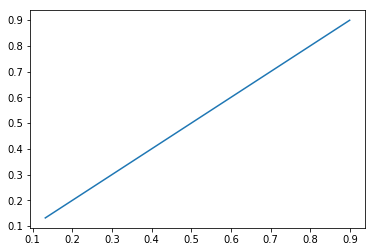

In [46]:
from sklearn.calibration import calibration_curve

x, y = calibration_curve(test_df['y'], test_df['iso_pred'])
plt.plot(x, y)

In [62]:
def evaluate_betting(val_df, buff=0):
    val_df['bet1'] = (1. / val_df['p1_b365']) < (val_df['iso_pred'] - buff)
    val_df['bet2'] = (1. / val_df['p2_b365']) < (1. - val_df['iso_pred'] - buff)

    bet_revenues = (
        val_df['p1_odds'] * val_df['bet1'] * val_df['y']  +
        val_df['p2_odds'] * val_df['bet2'] * (1. - val_df['y'])
    )

    bet_spending = val_df['bet1'] + val_df['bet2']
    profit_over_time = bet_revenues.cumsum() - bet_spending.cumsum()

    total_placed = bet_spending.sum()
    total_won = (val_df['bet1'] * val_df['y']).sum() + (val_df['bet2'] * (1. - val_df['y'])).sum()
    return bet_revenues.sum() - bet_spending.sum(), profit_over_time 

In [63]:
_, revenue_over_time = evaluate_betting(test_df)

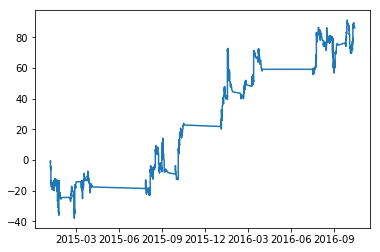

In [64]:
plt.plot(test_df['date'], revenue_over_time)

80 betting units a year, just on hardcourt!

In [47]:
test_df['p1_implied_b365'] = (1. / test_df['p1_b365'])
test_df['p2_implied_b365'] = (1. / test_df['p2_b365'])